In [4]:
print('oi')

oi


In [5]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from faker import Faker

# Função para gerar IDs de transação
def generate_transaction_id():
    return 'E' + ''.join(np.random.choice(list('0123456789ABCDEF'), size=17)) + 'Y76Y0'

# Função para gerar nomes fictícios de estabelecimentos brasileiros
def generate_brazilian_establishment_name(category):
    category_prefixes = {
        'Alimentacao': 'Restaurante',
        'Transporte': 'Posto',
        'Lazer': 'Cinema',
        'Saude': 'Farmacia',
        'Educacao': 'Escola',
        'Moradia': 'Imobiliaria',
        'Compras Online': 'E-commerce',
        'Servicos': 'Assistencia Tecnica',
        'Outros': 'Estabelecimento'
    }

    return f'{category_prefixes.get(category, "Estabelecimento")} {Faker("pt_BR").company_suffix()}'

# Função para categorizar transações
def categorize_transaction(loc, val):
    if 'Restaurante' in loc:
        subcategoria = 'Refeicao'
        categoria = 'Alimentacao'
        motivo = 'Alimentacao Fora de Casa'
    elif 'Posto' in loc:
        subcategoria = 'Combustivel'
        categoria = 'Transporte'
        motivo = 'Abastecimento de Veiculo'
    else:
        subcategoria = 'Outros'
        categoria = 'Outros'
        motivo = 'Despesa Diversificada'
    
    return categoria, subcategoria, motivo

# Criando dados fictícios para o DataFrame
np.random.seed(42)

n_transacoes = 64000  # Alterado para 64.000 linhas

data = {
    'ID_Transacao': [generate_transaction_id() for _ in range(n_transacoes)],
    'Data_Transacao': [datetime(2023, month, 1) + timedelta(days=np.random.randint(92)) for month in [6, 7, 8, 9, 10, 11] for _ in range(n_transacoes)],
    'Valor_Transacao': np.random.uniform(100, 80000, n_transacoes).round(2),
    'Tipo_Transacao': np.random.choice(['Transferencia', 'Saque', 'PIX'], p=[0.3, 0.2, 0.5], size=n_transacoes),
    'Categoria_Gasto': np.random.choice(['Alimentacao', 'Transporte', 'Lazer', 'Saude', 'Educacao', 'Moradia', 'Compras Online', 'Servicos', 'Outros'], size=n_transacoes),
    'Local_Transacao': [generate_brazilian_establishment_name(category) for category in np.random.choice(['Alimentacao', 'Transporte', 'Lazer', 'Saude', 'Educacao', 'Moradia', 'Compras Online', 'Servicos', 'Outros'], size=n_transacoes)],
    'Metodo_Pagamento': np.random.choice(['Debito', 'Credito', 'Transferencia', 'PIX'], p=[0.2, 0.3, 0.2, 0.3], size=n_transacoes),
    'Saldo_Antes': np.random.uniform(100, 50000, n_transacoes).round(2),
    'Tempo_Transacao': [datetime(2023, month, 1) + timedelta(hours=np.random.randint(24*92)) for month in [6, 7, 8, 9, 10, 11] for _ in range(n_transacoes)],
    'Feriado': np.random.choice([0, 1], size=n_transacoes),
    'Dia_Semana': np.random.choice(['Segunda', 'Terca', 'Quarta', 'Quinta', 'Sexta', 'Sabado', 'Domingo'], size=n_transacoes),
    'Volume_Transacoes': 0,
    'Parcelas': np.random.randint(1, 6, size=n_transacoes),
    'Tipo_Conta': np.random.choice(['Corrente', 'Poupanca'], size=n_transacoes),
    'Flag_Fraude': np.random.choice([0, 1], size=n_transacoes),
    'Pontuacao_Credito': np.random.randint(300, 850, size=n_transacoes),
    'Taxa_Juros': np.random.uniform(0, 0.2, n_transacoes),
    'Canal_Transacao': np.random.choice(['Online', 'Caixa Eletronico', 'Agencia'], size=n_transacoes),
    'Limite_Credito': np.random.uniform(40000, 80000, n_transacoes).round(2),
    'Historico_Inadimplencia': np.random.choice(['Bom', 'Regular', 'Ruim'], p=[0.7, 0.2, 0.1], size=n_transacoes),
    'Score_Gasto': np.random.randint(300, 850, size=n_transacoes),
    'Frequencia_Utilizacao_Cartao': np.random.choice(['Alta', 'Moderada', 'Baixa'], p=[0.4, 0.4, 0.2], size=n_transacoes),
    'Ciclo_Pagamento': np.random.choice(['Mensal', 'Quinzenal'], size=n_transacoes),
    'Comportamento_Pagamento': np.random.choice(['Pontual', 'Atrasado'], p=[0.8, 0.2], size=n_transacoes),
    'Participacao_Fidelidade': np.random.choice(['Sim', 'Nao'], p=[0.6, 0.4], size=n_transacoes),
}

base = pd.DataFrame(data)

# Adicionando as colunas adicionais
base[['Categoria_Gasto', 'Subcategoria_Gasto', 'Motivo_Transacao']] = base.apply(lambda row: pd.Series(categorize_transaction(row['Local_Transacao'], row['Valor_Transacao']) if row['Valor_Transacao'] is not None else ('Outros', 'Outros', 'Despesa Diversificada')), axis=1)

base['Saldo_Depois'] = base['Saldo_Antes'] - base['Valor_Transacao']
base['Volume_Transacoes'] = base.groupby('Tipo_Transacao')['Valor_Transacao'].transform('sum')


In [56]:
base['Data_Transacao'] = pd.to_datetime(base['Data_Transacao'])
base['Mes_Transacao'] = base['Data_Transacao'].dt.month
base


,ID_Transacao,Data_Transacao,Valor_Transacao,Tipo_Transacao,Categoria_Gasto,Local_Transacao,Metodo_Pagamento,Saldo_Antes,Saldo_Depois,Tempo_Transacao,...,Limite_Credito,Historico_Inadimplencia,Score_Gasto,Frequencia_Utilizacao_Cartao,Ciclo_Pagamento,Comportamento_Pagamento,Participacao_Fidelidade,Categoria_Gasto_Sub,Motivo_Transacao,Mes_Transacao
35422,E5348E83DC8E1419AAY76Y0,2023-09-11,26481.68,PIX,Abastecimento de Veiculo,Posto e Filhos,PIX,47057.24,20575.56,2023-08-05 11:00:00,...,45133.21,Bom,313,Alta,Mensal,Atrasado,Sim,Transporte,Combustivel,9
38670,E2C51CD434BD1A6667Y76Y0,2023-07-04,14521.92,PIX,Despesa Diversificada,Estabelecimento e Filhos,PIX,23848.60,9326.68,2023-08-09 13:00:00,...,48502.79,Bom,394,Moderada,Mensal,Atrasado,Sim,Outros,Outros,7
152684,E18AE587A79120B0C6Y76Y0,2023-09-04,18104.95,PIX,Despesa Diversificada,E-commerce Ltda.,Credito,26874.66,8769.71,2023-09-03 09:00:00,...,76643.67,Bom,586,Alta,Quinzenal,Pontual,Nao,Outros,Outros,9
13870,E7528AF7F3430F6C4CY76Y0,2023-07-01,4856.84,Transferencia,Alimentacao Fora de Casa,Restaurante S/A,Credito,28450.66,23593.82,2023-07-22 20:00:00,...,47073.89,Bom,513,Moderada,Mensal,Pontual,Nao,Alimentacao,Refeicao,7
136799,E0230C22680F0B239EY76Y0,2023-11-19,36244.15,Saque,Despesa Diversificada,Assistencia Tecnica Ltda.,Transferencia,5116.25,-31127.90,2023-11-15 03:00:00,...,45253.83,Regular,433,Baixa,Quinzenal,Pontual,Sim,Outros,Outros,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112125,E50B6C4967A218C036Y76Y0,2023-08-28,38348.96,PIX,Abastecimento de Veiculo,Posto - ME,Credito,1180.03,-37168.93,2023-10-19 12:00:00,...,41493.91,Regular,408,Baixa,Quinzenal,Pontual,Sim,Transporte,Combustivel,8
185949,EFB2E34999DEEF50B3Y76Y0,2023-10-24,33054.66,Transferencia,Despesa Diversificada,Imobiliaria Ltda.,Transferencia,27811.27,-5243.39,2023-09-20 04:00:00,...,58187.58,Bom,300,Alta,Quinzenal,Pontual,Sim,Outros,Outros,10
142756,E2303EA4B09438E0E3Y76Y0,2023-10-30,18921.31,PIX,Despesa Diversificada,Cinema - EI,Transferencia,16812.30,-2109.01,2023-10-13 22:00:00,...,57421.17,Bom,598,Moderada,Mensal,Pontual,Nao,Outros,Outros,10
18446,E2AA3D125374CA516BY76Y0,2023-07-23,31296.17,Saque,Abastecimento de Veiculo,Posto - EI,Credito,16557.98,-14738.19,2023-09-23 21:00:00,...,75044.57,Bom,552,Alta,Mensal,Pontual,Sim,Transporte,Combustivel,7


In [57]:
import locale
locale.setlocale(locale.LC_ALL, 'pt_BR')
valores= base['Valor_Transacao'].sum()
soma_valor_transacao_formatado = locale.currency(valores, grouping=True)

# Exibir o resultado
print(f'A soma dos valores de todas as transações no último Trim. de 2023 se dá em: {soma_valor_transacao_formatado}')

A soma dos valores de todas as transações no último Trim. de 2023 se dá em: R$ 1.280.610.899,20


Comportamento das transações: Tipo de transferencia e tendencia

Categoria gasto
Metodo de pagamento


c:\Users\morei\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\morei\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\morei\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\morei\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

<Axes: xlabel='Mes_Transacao', ylabel='count'>

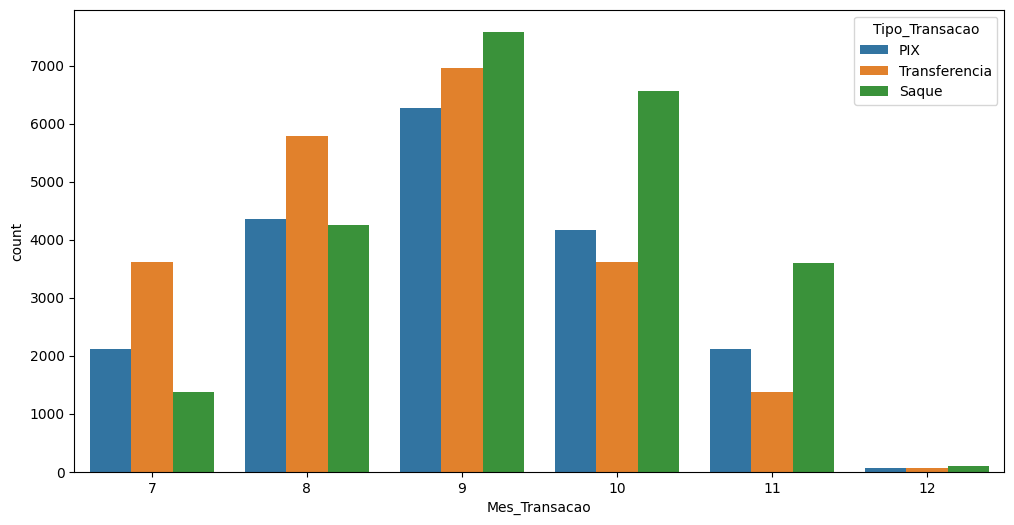

In [58]:
#Análise na tranferencia
plt.figure(figsize=(12, 6))
sns.countplot(x='Mes_Transacao', hue='Tipo_Transacao', data=base)



In [8]:
base

,ID_Transacao,Data_Transacao,Valor_Transacao,Tipo_Transacao,Categoria_Gasto,Local_Transacao,Metodo_Pagamento,Saldo_Antes,Saldo_Depois,Tempo_Transacao,...,Canal_Transacao,Limite_Credito,Historico_Inadimplencia,Score_Gasto,Frequencia_Utilizacao_Cartao,Ciclo_Pagamento,Comportamento_Pagamento,Participacao_Fidelidade,Categoria_Gasto_Sub,Motivo_Transacao
0,E63CEA7C46926AA743Y76Y0,2023-09-24,16800.14,Transferencia,Despesa Diversificada,Farmacia - EI,Debito,24595.83,7795.69,2023-07-01 03:00:00,...,Agencia,42893.28,Bom,582,Moderada,Mensal,Pontual,Sim,Outros,Outros
1,E7725417BD51FB40B9Y76Y0,2023-07-04,35026.07,Saque,Despesa Diversificada,Assistencia Tecnica e Filhos,Debito,18202.37,-16823.70,2023-07-21 21:00:00,...,Caixa Eletronico,41111.44,Bom,615,Alta,Quinzenal,Pontual,Sim,Outros,Outros
2,E5CB80AAE9FBBFEDDEY76Y0,2023-07-13,12317.15,PIX,Abastecimento de Veiculo,Posto - EI,Transferencia,13065.23,748.08,2023-09-02 23:00:00,...,Agencia,54952.93,Bom,558,Moderada,Quinzenal,Atrasado,Sim,Transporte,Combustivel
3,ED2B63F82426486138Y76Y0,2023-07-18,4500.22,Compra,Despesa Diversificada,Assistencia Tecnica - ME,Credito,42591.63,38091.41,2023-08-27 15:00:00,...,Agencia,50554.22,Regular,483,Alta,Quinzenal,Pontual,Sim,Outros,Outros
4,EBD1989413BEB6BC7EY76Y0,2023-08-22,36255.38,Compra,Despesa Diversificada,E-commerce S.A.,PIX,19146.68,-17108.70,2023-09-25 15:00:00,...,Online,46496.12,Bom,689,Baixa,Mensal,Pontual,Sim,Outros,Outros
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63995,E7C6D35C286ECB37F9Y76Y0,2023-09-22,5963.35,PIX,Despesa Diversificada,E-commerce S.A.,PIX,15195.90,9232.55,2023-08-12 13:00:00,...,Online,46843.80,Bom,382,Moderada,Mensal,Pontual,Sim,Outros,Outros
63996,E320B0135E09867EB1Y76Y0,2023-07-13,18629.58,PIX,Abastecimento de Veiculo,Posto - EI,Transferencia,36820.42,18190.84,2023-08-16 13:00:00,...,Agencia,69062.18,Bom,347,Moderada,Mensal,Atrasado,Sim,Transporte,Combustivel
63997,EB1EFB2E7E71CC8A51Y76Y0,2023-07-17,31390.17,Compra,Alimentacao Fora de Casa,Restaurante e Filhos,Debito,5890.31,-25499.86,2023-07-01 09:00:00,...,Agencia,62100.15,Bom,833,Baixa,Mensal,Pontual,Nao,Alimentacao,Refeicao
63998,E98C9697BA16C82F78Y76Y0,2023-07-20,37039.29,Compra,Despesa Diversificada,E-commerce S/A,Debito,27259.84,-9779.45,2023-08-21 23:00:00,...,Agencia,46834.43,Ruim,560,Alta,Quinzenal,Pontual,Sim,Outros,Outros


In [9]:
base.columns.tolist()

['ID_Transacao',
 'Data_Transacao',
 'Valor_Transacao',
 'Tipo_Transacao',
 'Categoria_Gasto',
 'Local_Transacao',
 'Metodo_Pagamento',
 'Saldo_Antes',
 'Saldo_Depois',
 'Tempo_Transacao',
 'Feriado',
 'Dia_Semana',
 'Volume_Transacoes',
 'Parcelas',
 'Tipo_Conta',
 'Flag_Fraude',
 'Pontuacao_Credito',
 'Taxa_Juros',
 'Canal_Transacao',
 'Limite_Credito',
 'Historico_Inadimplencia',
 'Score_Gasto',
 'Frequencia_Utilizacao_Cartao',
 'Ciclo_Pagamento',
 'Comportamento_Pagamento',
 'Participacao_Fidelidade',
 'Categoria_Gasto_Sub',
 'Motivo_Transacao']

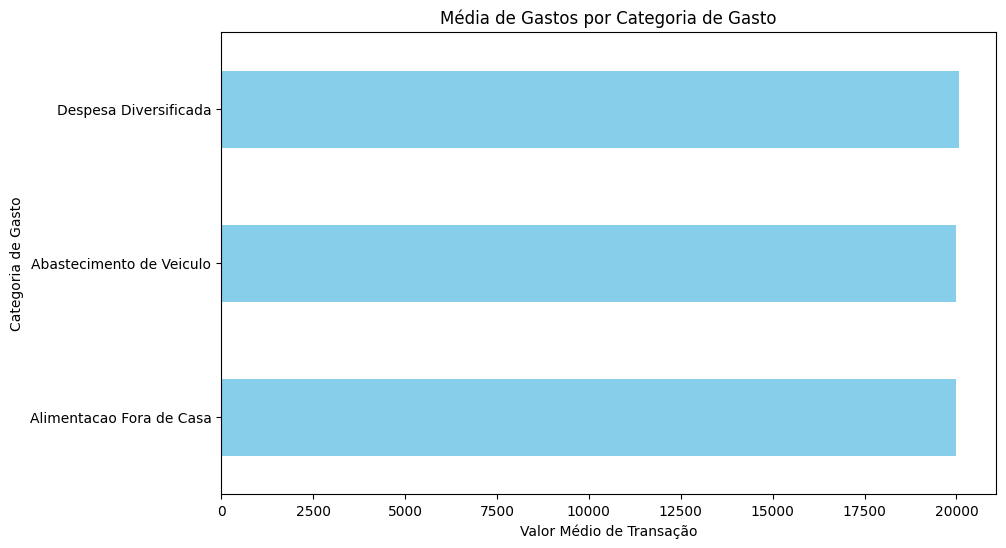

In [12]:
# Segmentação por Categoria de Gasto
gastos_por_categoria = base.groupby('Categoria_Gasto')['Valor_Transacao'].mean()
gastos_por_categoria

# Visualização: Gráfico de Barras
plt.figure(figsize=(10, 6))
gastos_por_categoria.sort_values().plot(kind='barh', color='skyblue')
plt.title('Média de Gastos por Categoria de Gasto')
plt.xlabel('Valor Médio de Transação')
plt.ylabel('Categoria de Gasto')
plt.show()
